In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
PATH =  '/content/drive/MyDrive/AIConnect/NLP_classificaiton/data'

train = pd.read_csv(os.path.join(PATH, 'train.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(PATH, 'test.csv'), encoding='utf-8')


,title,comment,bias,hate
0,"""'미스터 션샤인' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none


In [ ]:
test.head(5)

,ID,title,comment
0,0,"류현경♥︎박성훈, 공개연애 4년차 애정전선 이상無..""의지 많이 된다""[종합]",둘다 넘 좋다~행복하세요
1,1,"""현금 유도+1인 1라면?""…'골목식당' 백종원, 초심 잃은 도시락집에 '경악' [종합]",근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데
2,2,"입대 D-11' 서은광의 슬픈 멜로디..비투비, 눈물의 첫 체조경기장[콘서트 종합]",누군데 얘네?
3,3,"아이콘택트' 리쌍 길, 3년 전 결혼설 부인한 이유 공개…""결혼,출산 숨겼다""","쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ..."
4,4,"구하라, 안검하수 반박 해프닝...""당당하다""vs""그렇게까지"" 설전 [종합]",안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...


In [ ]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8367 non-null   object
 1   comment  8367 non-null   object
 2   bias     8367 non-null   object
 3   hate     8367 non-null   object
dtypes: object(4)
memory usage: 261.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       511 non-null    int64 
 1   title    511 non-null    object
 2   comment  511 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.1+ KB
None


In [ ]:
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)

Train Columns:  Index(['title', 'comment', 'bias', 'hate'], dtype='object')
Test Columns:  Index(['ID', 'title', 'comment'], dtype='object')


In [ ]:
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

Train Null: 
title      0
comment    0
bias       0
hate       0
dtype: int64

Test Null: 
ID         0
title      0
comment    0
dtype: int64


# bias 데이터 분포 확인

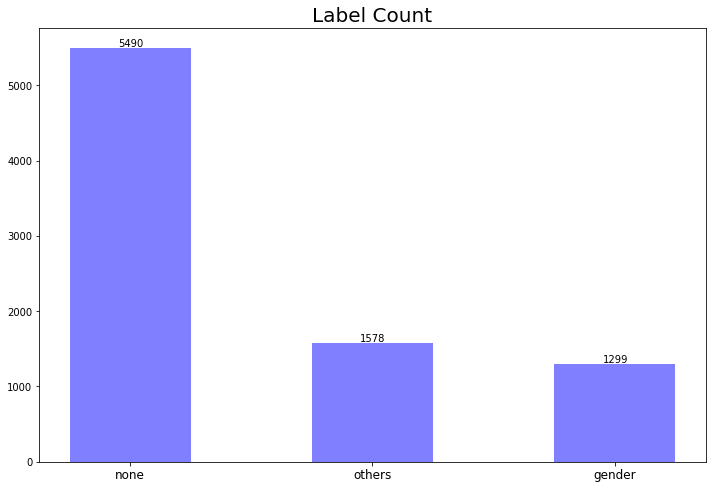

In [ ]:
feature = train['bias']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# hate 데이터 분포 확인

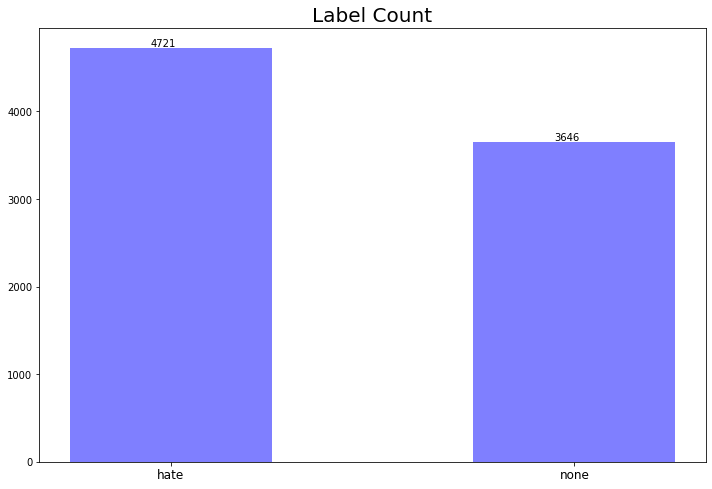

In [ ]:
feature = train['hate']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# title, comment 길이 확인 (공백, 특수문자도 1개의 단위 길이로 측정됨)

In [ ]:
max_len = np.max(train['title'].str.len())
min_len = np.min(train['title'].str.len())
mean_len = np.mean(train['title'].str.len())

print('Max title Length: ', max_len)
print('Min title Length: ', min_len)
print('Mean title Lenght: ', mean_len, '\n')

max_len = np.max(train['comment'].str.len())
min_len = np.min(train['comment'].str.len())
mean_len = np.mean(train['comment'].str.len())

print('Max comment	 Length: ', max_len)
print('Min comment	 Length: ', min_len)
print('Mean comment	 Lenght: ', mean_len)

Max title Length:  63
Min title Length:  2
Mean title Lenght:  42.4844030118322 

Max comment	 Length:  137
Min comment	 Length:  4
Mean comment	 Lenght:  38.72439345046014


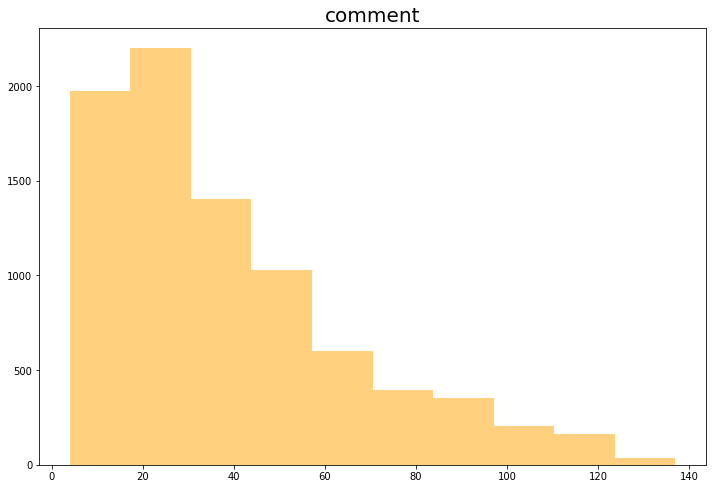

In [ ]:
# comment 길이별 분포
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('comment', fontsize=20)

plt.hist(train['comment'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

# 한글이 아닌거 제거(특수 문자, 숫자, 자음, 모음등)
* 토크나이징 하기 위해 제거 했으나 해당 과정을 생략하고 학습 시도 해볼 수 있음.


In [ ]:
train['title'] = train['title'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['title'] = test['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,title,comment,bias,hate
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none


In [ ]:
train['comment'] = train['comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['comment'] = test['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,title,comment,bias,hate
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길 행복은 머니순이 아니니깐 작은거에 감...,others,hate
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다,none,none


In [ ]:
train.head(5)

,title,comment,bias,hate,label
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none,0
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,0
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길 행복은 머니순이 아니니깐 작은거에 감...,others,hate,0
3,섹션 김해숙 허스토리 촬영 후 우울증 얻었다,일본 축구 져라,none,none,0
4,단독 임현주 아나운서 노브라 챌린지 방송 덕에 낸 용기 자연스런 논의의 창 됐으면 인터뷰,난 절대로 임현주 욕하는인간이랑은 안논다,none,none,0


In [ ]:
train['label'] = 0

ValueError: ignored

# Modeling

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 4.1 MB/s 
     |████████████████████████████████| 6.8 MB 51.1 MB/s 
     |████████████████████████████████| 596 kB 68.2 MB/s 
     |████████████████████████████████| 895 kB 56.4 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

In [ ]:
# seed 고정, gpu 고정
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(2022)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Load Tokenizer, Model
Hugging Face Hub에 존재하는 Pretrained Tokenizer와 Model 및 Model Config 불러오기

이 때, Classification은 num_labels가 2로 Default되어있기 때문에 Model Config의 Parameter를  6으로 변경

In [ ]:
모델 = 'klue/roberta-large' # 보통 tokenizer도 같은거 씀. 이거만 바꾸면 모델, tokenizer 변경 가능.

In [ ]:
MODEL_NAME = 모델

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3 # other, gender, 

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'class

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

# Tokenizing

In [ ]:
train.rename(columns = {'bias':'label'},inplace=True) # column 명이 label  이 아니면 학습이 안되길래 바꿔줌.

In [ ]:
train.head(3)

,title,comment,label,hate
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none
1,현장극사실주의 현실가장 보통의 연애 김래원공효진 16년만의 랑데부종합,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,손연재 리듬체조 학원 선생님 하고 싶은 일 해서 행복하다,누구처럼 돈만 밝히는 저급인생은 살아가지마시길 행복은 머니순이 아니니깐 작은거에 감...,others,hate


In [ ]:
train_dataset, eval_dataset = train_test_split(train, test_size=0.1, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    list(train_dataset['title']),
    list(train_dataset['comment']),
    return_tensors="pt",
    max_length=128, # Max_Length = 138  tokenizing 하면 길이가 줄어들어서 128로 해도 무관한듯 ?
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['title']),
    list(eval_dataset['comment']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    0,  6095,    24,  2593,  7764,  2156,  2205,  8535,  1284,  2073,
         2112,  2052,  2223,  2164,    26,  2019,  2429,  3135,  1432,  2348,
            2,  7296,  2164,  3991, 27135,  4920,  2144,  2319,  2062,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1])
[CLS] 단독 4살 연상연하 커플 손은서이주승 6개월째 열애 [SEP] 이주승 세상에서 제일부럽다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [ ]:

class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

In [ ]:

def label_to_num(label): 
    label_dict = {"none": 0, "others": 1, "gender": 2, "answer": 3}  #여기   answer 는 의미 없는거임 참고한 코드에 있어서 그냥 놔둠
    num_label = []

    for v in label: 
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

In [ ]:
train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(7529))
print(tokenizer.decode(train_dataset.__getitem__(7529)['input_ids'])) # 메서드 호출하면 이렇게 생겼구나 ..

7530
{'input_ids': tensor([    0, 26315, 16307,  2470, 10266,  2332,  2280, 18164,  2068,  3868,
         6750,  3996, 11800,  4548,  2372,  2121,     2,  6260,  2306,  2470,
         2306,  2259,  4807,  6991,  2113,  2899,  2259, 14167,  2118,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0,

In [ ]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

  return {
      'accuracy': acc,
  }

In [ ]:
training_ars = TrainingArguments(
    output_dir='/content/drive/MyDrive/AIConnect/NLP_classificaiton/result', # checkpoint 마다 모델이 해당 경로에 저장됨.
    num_train_epochs=7,
    per_device_train_batch_size=32,
    save_total_limit=5, # 성능 상위 5개 모델만 저장.  이거 용량 꽤 커서 제한 해줘야댐.
    save_steps=250,
    evaluation_strategy='steps',
    eval_steps = 250,
    load_best_model_at_end = True,  # parameter 의미를 정확히 모름 알아보고 바꿔주면 성능 올라갈듯.
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()
model.save_pretrained('/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/best_model')

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 7530
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1652


Step,Training Loss,Validation Loss,Accuracy
500,0.617400,0.696588,0.761051
1000,0.240900,1.135466,0.784946
1500,0.061900,1.397917,0.770609


***** Running Evaluation *****
  Num examples = 837
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-500
Configuration saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-500/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-500/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 837
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-1000
Configuration saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/AIConnect/NLP_classificai

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = 모델
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = '/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/checkpoint-1500'  # checkpoint 마다 미리 지정해둔 경로에 모델 저장됨 ㅇㅇ
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer_config.json from c

PreTrainedTokenizerFast(name_or_path='klue/roberta-large', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [ ]:
test['label'] = 'none'

In [ ]:
test.tail(5)

,ID,title,comment,label
506,506,이슈 최율 조재현 성추행 의혹 폭로 소속사 상황 파악 중,얜 그냥 봐도 아니다 ㅋ 고소당하면 어마어마한 금액 물어줘야할껄,none
507,507,해투4 이서진 한지민 대본 리딩 격리설 해명날씨가 좋아서 컷,대박 게스트 꼭 봐야징 컨셉이 바뀌니깐 재미지넹,none
508,508,인터뷰박민영 김비서 행복했다열애설엔 당당미소였으니까,성형으로 다 뜯어고쳐놓고 예쁜척 성형 전 니 얼굴 다 알고있다 순자처럼 된장냄새나게...,none
509,509,이슈사실무근 캐슬 측 위올라이 표절설 부인여전히 핫종합,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,none
510,510,오창석 이채은 웨딩사진순백의 드레스 입고 활짝,입에 손가릭이 10개 있으니 징그럽다,none


In [ ]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['title']),
    list(test['comment']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(510))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

511
{'input_ids': tensor([    0, 29203,  2055, 21238,  2073, 11925, 19877,  2017,  2353,  2079,
         9605,  1511,  2088, 10682,     2,  1511,  2170,  1284,  2116,  2870,
         2052,  3633,  2019,  1513,  5882,  1591,  2029,  2319,  2062,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0

In [ ]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 32/32 [00:05<00:00,  6.39it/s]

[0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 

In [ ]:
def num_to_label(label):
    label_dict = {0: "none", 1: "others", 2: "gender"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_label(pred_answer)
print(answer)

[[0, 'none'], [1, 'none'], [2, 'none'], [3, 'none'], [4, 'others'], [5, 'none'], [6, 'others'], [7, 'none'], [8, 'gender'], [9, 'none'], [10, 'none'], [11, 'gender'], [12, 'none'], [13, 'others'], [14, 'none'], [15, 'gender'], [16, 'none'], [17, 'none'], [18, 'none'], [19, 'none'], [20, 'gender'], [21, 'none'], [22, 'others'], [23, 'none'], [24, 'none'], [25, 'none'], [26, 'others'], [27, 'none'], [28, 'none'], [29, 'none'], [30, 'others'], [31, 'gender'], [32, 'none'], [33, 'others'], [34, 'none'], [35, 'gender'], [36, 'none'], [37, 'none'], [38, 'none'], [39, 'none'], [40, 'gender'], [41, 'others'], [42, 'others'], [43, 'none'], [44, 'none'], [45, 'none'], [46, 'none'], [47, 'none'], [48, 'none'], [49, 'gender'], [50, 'others'], [51, 'others'], [52, 'none'], [53, 'gender'], [54, 'none'], [55, 'others'], [56, 'gender'], [57, 'none'], [58, 'others'], [59, 'others'], [60, 'others'], [61, 'gender'], [62, 'none'], [63, 'gender'], [64, 'none'], [65, 'others'], [66, 'none'], [67, 'none'], [

In [ ]:
df = pd.DataFrame(answer, columns=['ID', 'bias'])

df.to_csv('/content/drive/MyDrive/AIConnect/NLP_classificaiton/mybaseline_submit01.csv', index=False) # 매번 파일 이름 바꿔주자

print(df)

      ID    bias
0      0    none
1      1    none
2      2    none
3      3    none
4      4  others
..   ...     ...
506  506    none
507  507    none
508  508  others
509  509    none
510  510    none

[511 rows x 2 columns]


In [ ]:
df.head(7) # 6번 row 제대로 판별 했구만 ?

,ID,bias
0,0,none
1,1,none
2,2,none
3,3,none
4,4,others
5,5,none
6,6,others


# bias 끝

# 이제 hate 모델을 만들어 보자
bias 와 똑같이 진행 하되, Number of classes 를 2로 바꾸고 label column 을 바꿔주자

In [ ]:
# tokenizer 는 위에서 이미 load 되어 있으므로 생략 해도됨(아마도)
MODEL_NAME = 모델  # 위에 test 할때 MODEL_NAME 변수에 checkpoint-1500 모델로 저장되어 있어서 새로 불러옴 ㅇㅇ

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 2 # 이거 바꿔줘야됨 . hate 는 라벨링이  none, hate 두개니까 

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer_config.json from c

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

In [ ]:
train.head(1)

,title,comment,label,hate
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none


In [ ]:
train.rename(columns = {'label':'bias', 'hate':'label'},inplace=True) # label -> bias ,  hate -> label   아니면 train dataset 새로 불러오던가.

In [ ]:
train.head(1)

,title,comment,bias,label
0,미스터 션샤인 변요한 김태리와 같은 양복 입고 학당 방문 이유는,김태리 정말 연기잘해 진짜,none,none


In [ ]:
train_dataset, eval_dataset = train_test_split(train, test_size=0.1, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    list(train_dataset['title']),
    list(train_dataset['comment']),
    return_tensors="pt",
    max_length=128, # Max_Length = 138
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['title']),
    list(eval_dataset['comment']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    0,   732,  3658,  2444,  2156,  2348,  2079,  1045,  2195, 15350,
        13000,  2118,  2170,   852,  2084,  2251,  7473,  4339,     2,  1377,
         2546,  3615,  3611,  2031,  1160,  2460, 24006,  2052,  9887,  3725,
            2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1])
[CLS] 내 이상형연애의 맛3 정준 김유지에 돌직구 고백 종합 [SEP] 악플 다는 사람들 보면 제정신이 아님 ㅋㅋ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [ ]:
# hate label 에 맞게 바꿔주자   # 좀더 깔끔한 방법이 있을거같은데 일단 ㄱ
def hate_to_num(label): 
    label_dict = {"none": 0, "hate": 1}
    num_label = []

    for v in label: 
        num_label.append(label_dict[v])
    
    return num_label


train_label = hate_to_num(train_dataset['label'].values)
eval_label = hate_to_num(eval_dataset['label'].values)

In [ ]:
train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(7529))
print(tokenizer.decode(train_dataset.__getitem__(7529)['input_ids']))

7530
{'input_ids': tensor([    0,  3861,  2205,  2232,  1632, 29303,  2288, 18605,  1839,  7285,
         1504,  3333,  2264,  1028,  3333,  2264,  8455,  2259,     3, 25740,
            2,  8902,  2079,  5581,  2015,  2456,  3797,  3915,  2097,  2178,
         2155, 13764,  2125,  2052,  2088, 12813, 28674,  4296,  2855,  2765,
         2069,  4296,  4695,  2371,  2075,  4429,  2015,  2456,  6233,  4121,
         4538,  4224,  4697,  2443,  2227,  1891, 13911,  2170,  5414,  2456,
         2318,  5657, 11187,  3635,  2116,   859,  2259,  8902,  2052,  2529,
         2251,  2083,  2042,  2302,  2210,  5414,  2369,  2181,  5261,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0,

In [ ]:
training_ars = TrainingArguments(
    output_dir='/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates',
    num_train_epochs=7,
    per_device_train_batch_size=32,
    save_total_limit=5,
    save_steps=250,
    evaluation_strategy='steps',
    eval_steps = 250,
    load_best_model_at_end = True,
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.train()
model.save_pretrained('/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/best_model')

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 7530
  Num Epochs = 7
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1652


Step,Training Loss,Validation Loss,Accuracy
250,No log,0.467408,0.789725
500,0.453600,0.585727,0.787336
750,0.453600,1.051632,0.789725
1000,0.151500,1.011236,0.807646
1250,0.151500,0.989286,0.816010
1500,0.040300,1.239340,0.801673


***** Running Evaluation *****
  Num examples = 837
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-250
Configuration saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-250/config.json
Model weights saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-250/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-250/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-250/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 837
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-500
Configuration saved in /content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-500/config.json
Model weights saved in /content

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = 모델
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = '/content/drive/MyDrive/AIConnect/NLP_classificaiton/result/hates/checkpoint-1250'  # checkpoint 마다 미리 지정해둔 경로에 모델 저장됨 ㅇㅇ
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer_config.json from c

PreTrainedTokenizerFast(name_or_path='klue/roberta-large', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [ ]:
test['label'] = 'none' # label column 생성 아무값으로 ㄱ

In [ ]:
test.tail(3)

,ID,title,comment,label
508,508,인터뷰박민영 김비서 행복했다열애설엔 당당미소였으니까,성형으로 다 뜯어고쳐놓고 예쁜척 성형 전 니 얼굴 다 알고있다 순자처럼 된장냄새나게...,none
509,509,이슈사실무근 캐슬 측 위올라이 표절설 부인여전히 핫종합,분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...,none
510,510,오창석 이채은 웨딩사진순백의 드레스 입고 활짝,입에 손가릭이 10개 있으니 징그럽다,none


In [ ]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['title']),
    list(test['comment']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(510))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

511
{'input_ids': tensor([    0, 29203,  2055, 21238,  2073, 11925, 19877,  2017,  2353,  2079,
         9605,  1511,  2088, 10682,     2,  1511,  2170,  1284,  2116,  2870,
         2052,  3633,  2019,  1513,  5882,  1591,  2029,  2319,  2062,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0

In [ ]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 32/32 [00:04<00:00,  6.55it/s]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 

In [ ]:
print(output_prob) # 오.. 이거 확률값.. threshold 가능 할듯 ?

[[0.9991170763969421, 0.0008829247672110796], [0.9991083741188049, 0.0008915908401831985], [0.005740121938288212, 0.9942598342895508], [0.001996200531721115, 0.9980037808418274], [0.10336023569107056, 0.8966397047042847], [0.009613646194338799, 0.9903863668441772], [0.002178217051550746, 0.9978218078613281], [0.0021807036828249693, 0.9978193044662476], [0.0025114610325545073, 0.9974884986877441], [0.9991784691810608, 0.0008215216803364456], [0.9989328980445862, 0.0010671279160305858], [0.0024257157929241657, 0.9975742697715759], [0.999099612236023, 0.0009004544117487967], [0.0024377668742090464, 0.9975622892379761], [0.9990532994270325, 0.0009466661140322685], [0.0024462358560413122, 0.9975537657737732], [0.007877831347286701, 0.9921221137046814], [0.004515606444329023, 0.995484471321106], [0.0027138672303408384, 0.9972860813140869], [0.9991201758384705, 0.000879871950019151], [0.001997800078243017, 0.9980022311210632], [0.9990386962890625, 0.0009612852591089904], [0.002551975660026073

In [ ]:
def num_to_hate(label):
    label_dict = {0: "none", 1: "hate"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_hate(pred_answer)
print(answer)

[[0, 'none'], [1, 'none'], [2, 'hate'], [3, 'hate'], [4, 'hate'], [5, 'hate'], [6, 'hate'], [7, 'hate'], [8, 'hate'], [9, 'none'], [10, 'none'], [11, 'hate'], [12, 'none'], [13, 'hate'], [14, 'none'], [15, 'hate'], [16, 'hate'], [17, 'hate'], [18, 'hate'], [19, 'none'], [20, 'hate'], [21, 'none'], [22, 'hate'], [23, 'hate'], [24, 'hate'], [25, 'none'], [26, 'hate'], [27, 'none'], [28, 'none'], [29, 'none'], [30, 'hate'], [31, 'hate'], [32, 'hate'], [33, 'none'], [34, 'none'], [35, 'hate'], [36, 'hate'], [37, 'hate'], [38, 'none'], [39, 'none'], [40, 'hate'], [41, 'hate'], [42, 'hate'], [43, 'hate'], [44, 'none'], [45, 'none'], [46, 'hate'], [47, 'hate'], [48, 'none'], [49, 'hate'], [50, 'hate'], [51, 'none'], [52, 'hate'], [53, 'hate'], [54, 'none'], [55, 'hate'], [56, 'hate'], [57, 'none'], [58, 'none'], [59, 'hate'], [60, 'hate'], [61, 'hate'], [62, 'none'], [63, 'hate'], [64, 'hate'], [65, 'hate'], [66, 'hate'], [67, 'hate'], [68, 'none'], [69, 'hate'], [70, 'none'], [71, 'hate'], [

In [ ]:
df_hate = pd.DataFrame(answer, columns=['ID', 'hate'])
df_hate.tail(3)

,ID,hate
508,508,hate
509,509,hate
510,510,hate


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIConnect/NLP_classificaiton/mybaseline_submit01.csv') # 아까 저장한 bias csv 파일 load
df.tail(3)

,ID,bias
508,508,others
509,509,none
510,510,none


In [ ]:
df['hate'] = df_hate['hate']  # df 에 hate column 을 만들어서 hate 값 추가
df.tail(3)

,ID,bias,hate
508,508,others,hate
509,509,none,hate
510,510,none,hate


In [ ]:
# bias, hate 값이 들어간 최종 csv 파일 
df.to_csv('/content/drive/MyDrive/AIConnect/NLP_classificaiton/mybaseline_submit01.csv', index=False) # 매번 파일 이름 바꿔주자

print(df)

      ID    bias  hate
0      0    none  none
1      1    none  none
2      2    none  hate
3      3    none  hate
4      4  others  hate
..   ...     ...   ...
506  506    none  none
507  507    none  none
508  508  others  hate
509  509    none  hate
510  510    none  hate

[511 rows x 3 columns]


In [ ]:
# 이제 제출하러 ㄱㄱ 